## To identify distinct transactional patterns and behavioral segments within the retail dataset(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("../datasets/raw/Online Retail.xlsx")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
print((df.isna().mean()*100).map('{:.2f}%'.format))

InvoiceNo       0.00%
StockCode       0.00%
Description     0.27%
Quantity        0.00%
InvoiceDate     0.00%
UnitPrice       0.00%
CustomerID     24.93%
Country         0.00%
dtype: object


In [6]:
print(df.duplicated().sum())

5268


In [7]:
# summary discription of numerical datas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303



## 1. Numerica Data Analysis
### 1.1 Quantity Analysis
Tracks the volume of items per transaction.

- **Central Tendency:**  
  - Average purchase: **9.55 units**  
  - Median purchase: **3.0 units**  
  - Observation: Distribution is **right-skewed**, with many small purchases and a few very large ones.

- **Dispersion:**  
  - Standard deviation: **218.08**  
  - Maximum: **80,995 units**  
  - Indicates presence of **significant outliers**.

- **Anomalies:**  
  - Minimum: **-80,995 units**, likely representing **returns or cancellations**.

---

### 1.2 Temporal Range (InvoiceDate)
Analyzes the time span of the transactions.

- **Start Date:** `2010-12-01 08:26:00`  
- **End Date:** `2011-12-09 12:50:00`  
- **Average Date:** Around **July 4, 2011**  
- Observation: Data spans **approximately one year**, providing a complete seasonal view.

---

### 1.3 Unit Price Distribution
Pricing metrics for products in the catalog.

- **Pricing Tiers:**  
  - **25% (Budget):** ≤ $1.25  
  - **50% (Standard, Median):** $2.08  
  - **75% (Premium):** ≥ $4.13  

- **Note:**  
  - Minimum price: **-$11,062.06**, which likely represents **errors or refunds**.  
  - Data cleaning is recommended before financial modeling.

---

### 1.4. Customer Coverage
Insight into customer data quality.

- **Active Customers:** **406,829** records with valid `CustomerID`.  
- **Missing Data:** Approximately **135,080 rows** (~25%) lack `CustomerID`.  
- Observation: Missing data may impact **customer-level analysis** and **segmentation**.


In [8]:
print(df.describe(include='object').T)

              count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
Country      541909     38                      United Kingdom  495478


## 2. Categorical Feature Analysis

This section explores the non-numeric metadata of the transactional dataset. Initial observation reveals high cardinality in product identifiers and a heavy geographical bias toward the domestic market.

### 2.1 Feature Summary Table
The table below summarizes the distribution of the primary categorical variables across **541,909** records.

| Feature | Unique Count | Top Value | Frequency | Business Insight |
| :--- | :--- | :--- | :--- | :--- |
| **InvoiceNo** | 25,900 | `573585` | 1,114 | High frequency in single invoices suggests bulk/B2B purchasing. |
| **StockCode** | 4,070 | `85123A` | 2,313 | Inventory is diverse, but sales are concentrated in top SKUs. |
| **Description** | 4,223 | `WHITE HANGING HEART...` | 2,369 | This "Anchor Product" serves as a primary entry point for customers. |
| **Country** | 38 | `United Kingdom` | 495,478 | **91.4% Market Share** is domestic; international is a growth niche. |

---

### 2.2 Key Data Insights

#### A. The "Wholesaler" Signature
The presence of **Invoice 573585**, which contains **1,114 unique entries**, indicates that the dataset includes wholesale or B2B (Business-to-Business) entities. 
* **Model Impact:** These outliers can skew K-Means centroids. They are treated as a distinct "Wholesaler" segment to avoid diluting the "Retail Shopper" personas.

#### B. High Cardinality & Dimensionality
With over **4,000 unique product descriptions**, using standard encoding techniques (like One-Hot Encoding) would lead to the *Curse of Dimensionality*, expanding the dataset into 4,000+ sparse columns.
* **Modeling Strategy:** Instead of encoding product names, we engineered features such as **"Variety of Products Bought"** and **"Average Items per Transaction"** to capture behavior without overwhelming the model.



#### C. Geographical Concentration
The vast majority of transactions occur in the **United Kingdom (91.4%)**.
* **Strategic Action:** For marketing purposes, the "Country" feature is collapsed into a binary category: **Domestic (UK)** vs. **International**. This simplifies the model while retaining the most important geographical distinction.



---

### 2.3 Implications for Modeling
The categorical analysis confirms that the data is not "isotropic" (uniform). The high frequency of specific items and the dominance of the UK market suggest that a **Centroid-based approach (K-Means)** will be effective at slicing the main "Retail Cloud," while **DBSCAN** may be useful specifically for isolating the massive B2B invoices as outliers.

In [9]:
df = df.drop(columns=["CustomerID"])

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [11]:
description_mode = df['Description'].mode()[0]
df["Description"] = df["Description"].fillna(description_mode)

In [12]:
print((df.isna().mean()*100).map('{:.2f}%'.format))

InvoiceNo      0.00%
StockCode      0.00%
Description    0.00%
Quantity       0.00%
InvoiceDate    0.00%
UnitPrice      0.00%
Country        0.00%
dtype: object


## Feature Type Identification handaling datetime(Feature Engineering)

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


C:\Users\Dell\AppData\Local\Temp\ipykernel_21880\1863749894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour',palette = 'viridis')


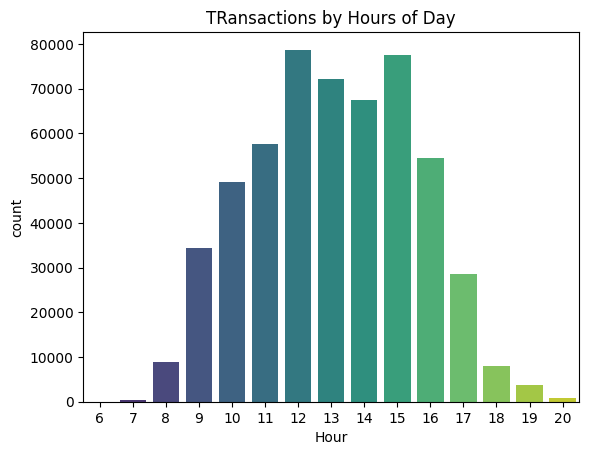

In [14]:
df["Hour"] = df["InvoiceDate"].dt.hour
sns.countplot(data=df, x='Hour',palette = 'viridis')
plt.title("TRansactions by Hours of Day")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21880\3561446687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DayOfWeek",order=day_order,palette = 'viridis')


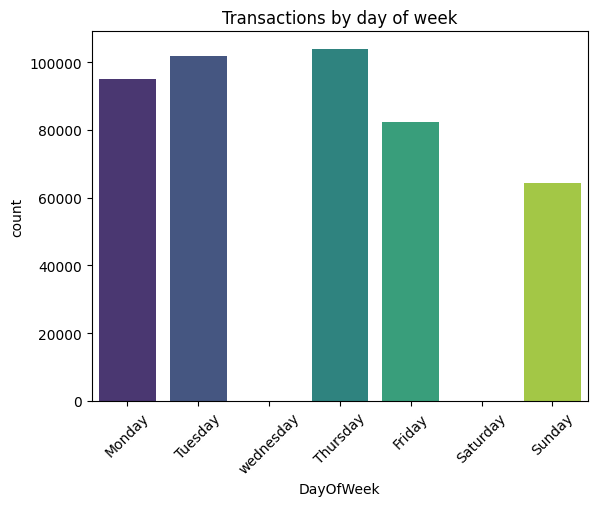

In [15]:
df["DayOfWeek"]  = df["InvoiceDate"].dt.day_name()
day_order = ["Monday", "Tuesday", "wednesday","Thursday","Friday", "Saturday", "Sunday"]
sns.countplot(data=df, x="DayOfWeek",order=day_order,palette = 'viridis')
plt.xticks(rotation=45)
plt.title("Transactions by day of week")
plt.show()

## saturday and wednesday have no any transactions.It should be off day or Close day 

C:\Users\Dell\AppData\Local\Temp\ipykernel_21880\1324108784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Months", order=months_order, palette="viridis")


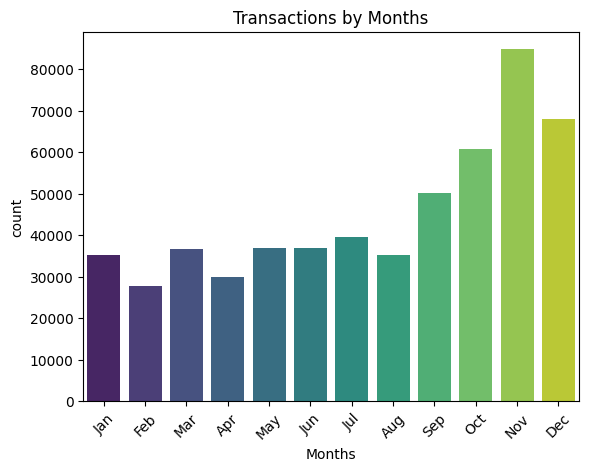

In [16]:
df["Months"] = df["InvoiceDate"].dt.month_name().str[:3]
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.countplot(data=df, x="Months", order=months_order, palette="viridis")
plt.xticks(rotation=45)
plt.title("Transactions by Months")
plt.show()

In [17]:
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])
df["Hours"] = df["InvoiceDate"].dt.hour
df["DayOfweek"] = df["InvoiceDate"].dt.dayofweek
df['Month'] = df["InvoiceDate"].dt.month
df["TotalValue"] = df["Quantity"]*df["UnitPrice"]
df.drop("InvoiceDate",axis=1,inplace=True)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Hour,DayOfWeek,Months,Hours,DayOfweek,Month,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,8,Wednesday,Dec,8,2,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,8,Wednesday,Dec,8,2,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,8,Wednesday,Dec,8,2,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,8,Wednesday,Dec,8,2,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,8,Wednesday,Dec,8,2,12,20.34


In [19]:
cancled_orders = df[df["Quantity"]<0]
print(f"Total cancled orders :{len(cancled_orders)}")

Total cancled orders :10624


In [20]:
df= df[(df["UnitPrice"]>0) & (df["TotalValue"]>0)]
df.drop(columns=["Hour","DayOfWeek","Months"],inplace=True)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,530104.0,10.542037,155.524124,1.000,1.00,3.00,10.00,80995.00
UnitPrice,530104.0,3.907625,35.915681,0.001,1.25,2.08,4.13,13541.33
Hours,530104.0,13.075623,2.438741,6.000,11.00,13.00,15.00,20.00
DayOfweek,530104.0,2.436626,1.850651,0.000,1.00,2.00,4.00,6.00
Month,530104.0,7.560611,3.508496,1.000,5.00,8.00,11.00,12.00
TotalValue,530104.0,20.121871,270.356743,0.001,3.75,9.90,17.70,168469.60


In [22]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,530104,19960,573585,1114
StockCode,530104,3922,85123A,2265
Description,530104,4026,WHITE HANGING HEART T-LIGHT HOLDER,2323
Country,530104,38,United Kingdom,485123


In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Hours,DayOfweek,Month,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,8,2,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,8,2,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,8,2,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,8,2,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,8,2,12,20.34


In [24]:
df.drop(columns=["InvoiceNo","StockCode"],inplace=True)

In [25]:
print(df.shape)

(530104, 8)


In [26]:
print(df.duplicated().sum())

48567


In [27]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [28]:
print(df.shape[0])

481537


## Univariant feature Analysis

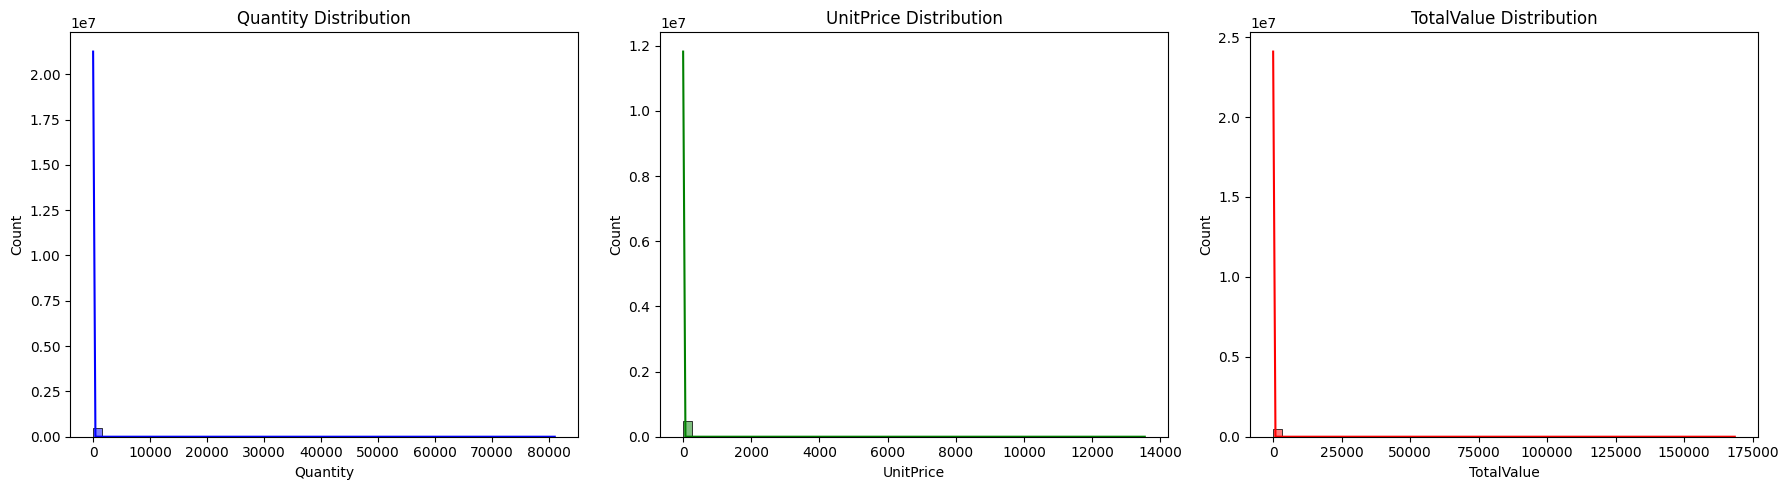

In [29]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.histplot(df['Quantity'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Quantity Distribution')

sns.histplot(df['UnitPrice'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('UnitPrice Distribution')

sns.histplot(df['TotalValue'], bins=50, kde=True, ax=axes[2], color='red')
axes[2].set_title('TotalValue Distribution')

plt.tight_layout()
plt.show()

## Bivariate Analysis (Relation between Features)

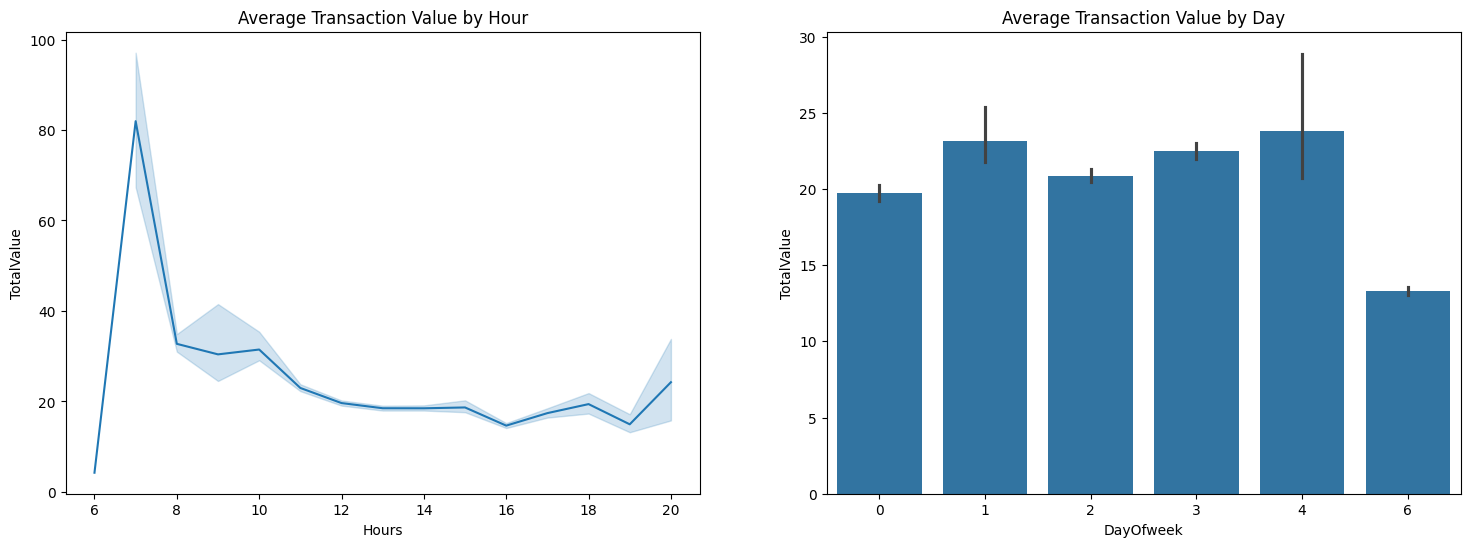

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(data=df, x='Hours', y='TotalValue', estimator='mean', ax=axes[0])
axes[0].set_title('Average Transaction Value by Hour')

sns.barplot(data=df, x='DayOfweek', y='TotalValue', estimator='mean', ax=axes[1])
axes[1].set_title('Average Transaction Value by Day')

plt.show()

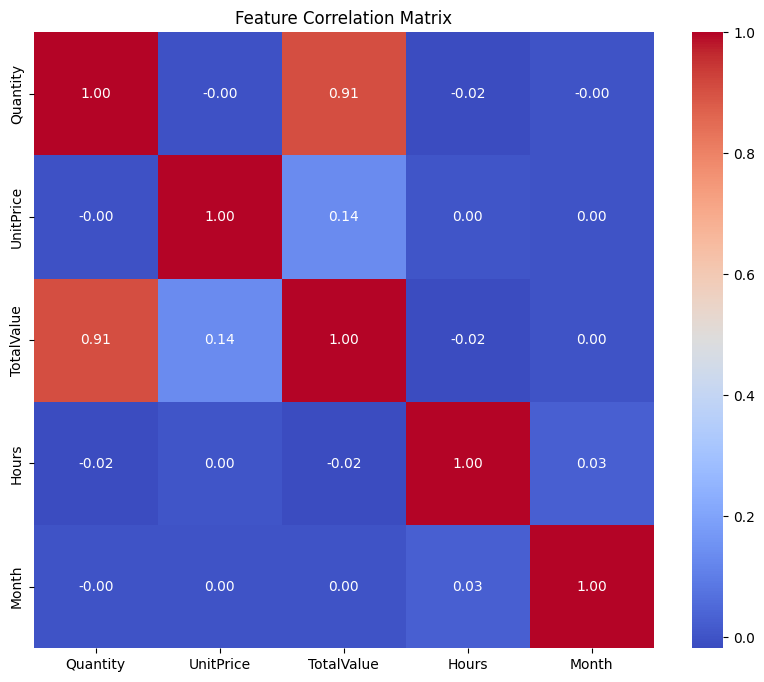

In [31]:
plt.figure(figsize=(10, 8))
corr = df[['Quantity', 'UnitPrice', 'TotalValue', 'Hours', 'Month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

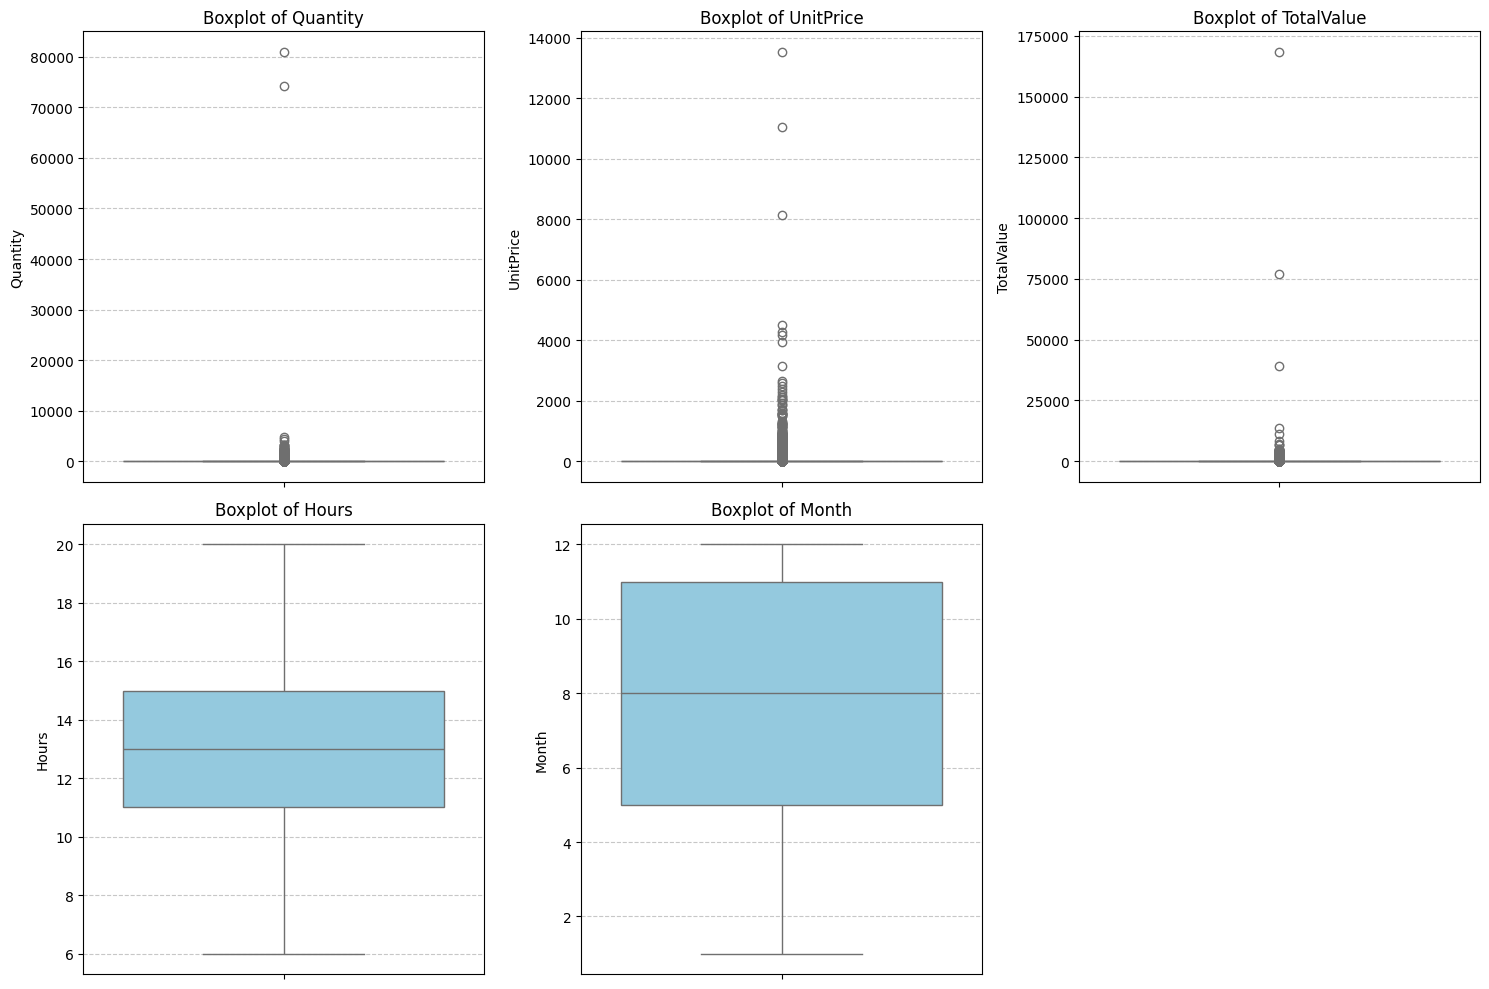

In [32]:
num_features = ['Quantity', 'UnitPrice', 'TotalValue', 'Hours', 'Month']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [33]:

cols_to_clean = ['Quantity', 'UnitPrice', 'TotalValue']

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Data cleaned. New row count: {len(df)}")

Data cleaned. New row count: 401342


In [34]:
df.head()

,Description,Quantity,UnitPrice,Country,Hours,DayOfweek,Month,TotalValue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,8,2,12,15.30
1,WHITE METAL LANTERN,6,3.39,United Kingdom,8,2,12,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,8,2,12,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,8,2,12,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,8,2,12,20.34


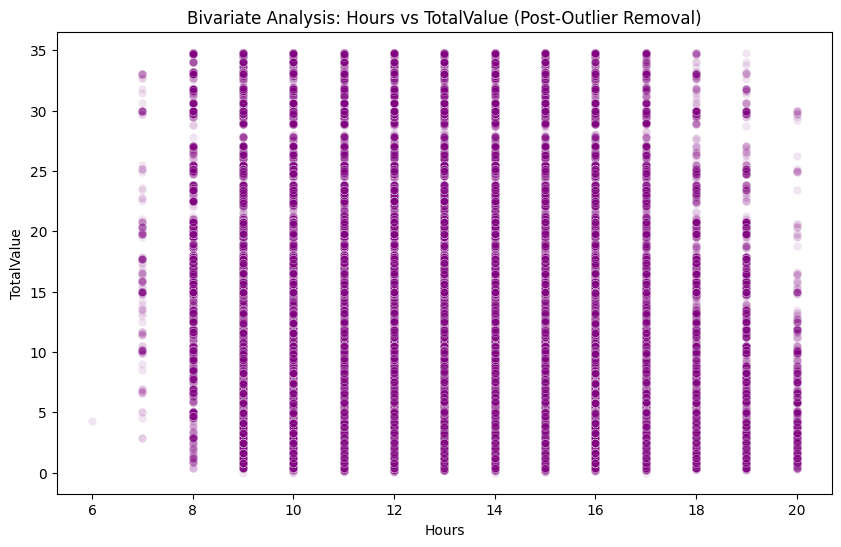

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours', y='TotalValue', alpha=0.1, color='purple')
plt.title('Bivariate Analysis: Hours vs TotalValue (Post-Outlier Removal)')
plt.show()

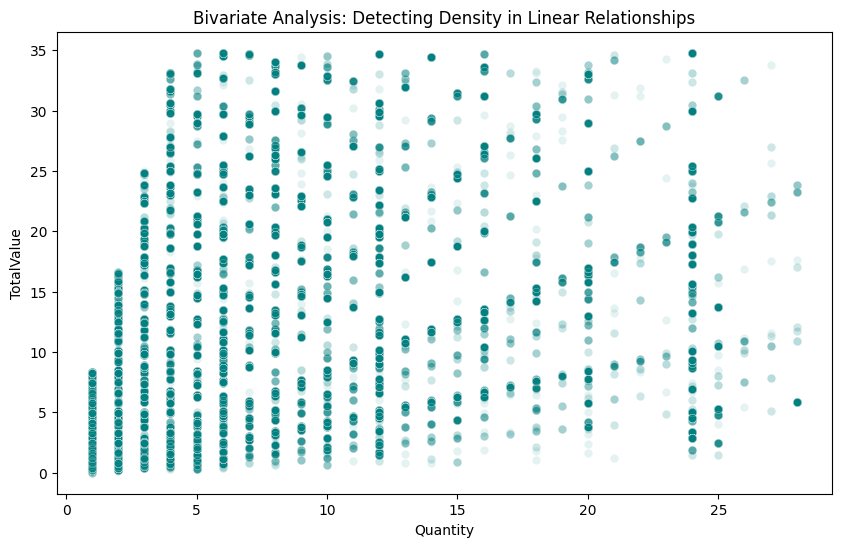

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='TotalValue', alpha=0.1, color='teal')
plt.title('Bivariate Analysis: Detecting Density in Linear Relationships')
plt.show()

In [37]:
df.drop('TotalValue',axis=1)


,Description,Quantity,UnitPrice,Country,Hours,DayOfweek,Month
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,8,2,12
1,WHITE METAL LANTERN,6,3.39,United Kingdom,8,2,12
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,8,2,12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,8,2,12
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,8,2,12
...,...,...,...,...,...,...,...
481532,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,12,4,12
481533,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,12,4,12
481534,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,12,4,12
481535,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,12,4,12


In [43]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Quantity','UnitPrice','Hours','DayOfweek','Month']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

array([[ 0.03791016,  0.02241523, -2.11205962, -0.24284044,  1.27050465],
       [ 0.03791016,  0.46484647, -2.11205962, -0.24284044,  1.27050465],
       [ 0.36615794,  0.127756  , -2.11205962, -0.24284044,  1.27050465],
       ...,
       [-0.29033761,  0.86514141, -0.47333804,  0.82784184,  1.27050465],
       [-0.29033761,  0.86514141, -0.47333804,  0.82784184,  1.27050465],
       [-0.4544615 ,  1.2865045 , -0.47333804,  0.82784184,  1.27050465]],
      shape=(401342, 5))

In [46]:
new_preprocessed_data = pd.DataFrame(X_scaled,columns = numerical_cols)
new_preprocessed_data.to_csv("Preprocessed_data_1.csv")

In [48]:
new_data = pd.read_csv('Preprocessed_data_1.csv')
new_data.head()

,Unnamed: 0,Quantity,UnitPrice,Hours,DayOfweek,Month
0,0,0.037910,0.022415,-2.11206,-0.24284,1.270505
1,1,0.037910,0.464846,-2.11206,-0.24284,1.270505
2,2,0.366158,0.127756,-2.11206,-0.24284,1.270505
3,3,0.037910,0.464846,-2.11206,-0.24284,1.270505
4,4,0.037910,0.464846,-2.11206,-0.24284,1.270505
